In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [2]:

# Load extracted features
data = pd.read_csv('/content/drive/MyDrive/balanced_extracted_features_12000.csv')

# Split features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42, tree_method='gpu_hist')
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=200, random_state=42)
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('mlp', mlp_model)
    ],
    final_estimator=LogisticRegression()
)

In [4]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [5]:
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:20:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [6]:
mlp_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), random_state=42)

In [7]:
stacking_model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:21:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:22:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:22:13] WARNING: /work

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('mlp',
                                MLPClassifier(hidden_layer_sizes=(128, 64),
                                              random_state=42))],
                   final_estimator=LogisticRegression())

In [8]:
# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_mlp = mlp_model.predict(X_test)
y_pred_stacking = stacking_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:23:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:23:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [9]:
# Evaluate all models
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    return {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": class_report['macro avg']['precision'],
        "Recall": class_report['macro avg']['recall'],
        "F1-Score": class_report['macro avg']['f1-score']
    }

results = []
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb))
results.append(evaluate_model("Neural Network", y_test, y_pred_mlp))
results.append(evaluate_model("Stacking", y_test, y_pred_stacking))

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv('results.csv', index=False)

Random Forest Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       937
           1       0.95      0.95      0.95      1004
           2       0.91      0.78      0.84      1020
           3       0.82      0.95      0.88      1022

    accuracy                           0.91      3983
   macro avg       0.91      0.91      0.91      3983
weighted avg       0.91      0.91      0.91      3983

XGBoost Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       937
           1       0.95      0.95      0.95      1004
           2       0.91      0.79      0.84      1020
           3       0.83      0.94      0.88      1022

    accuracy                           0.91      3983
   macro avg       0.91      0.91      0.91      3983
weighted avg       0.91      0.91      0.91      3983

Neural Network Accuracy: 0.90
              precision    recall  f1-score   su

<ipython-input-10-3fca19f19aa6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
<ipython-input-10-3fca19f19aa6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
<ipython-input-10-3fca19f19aa6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
<ipython-input-10-3fca19f19aa6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

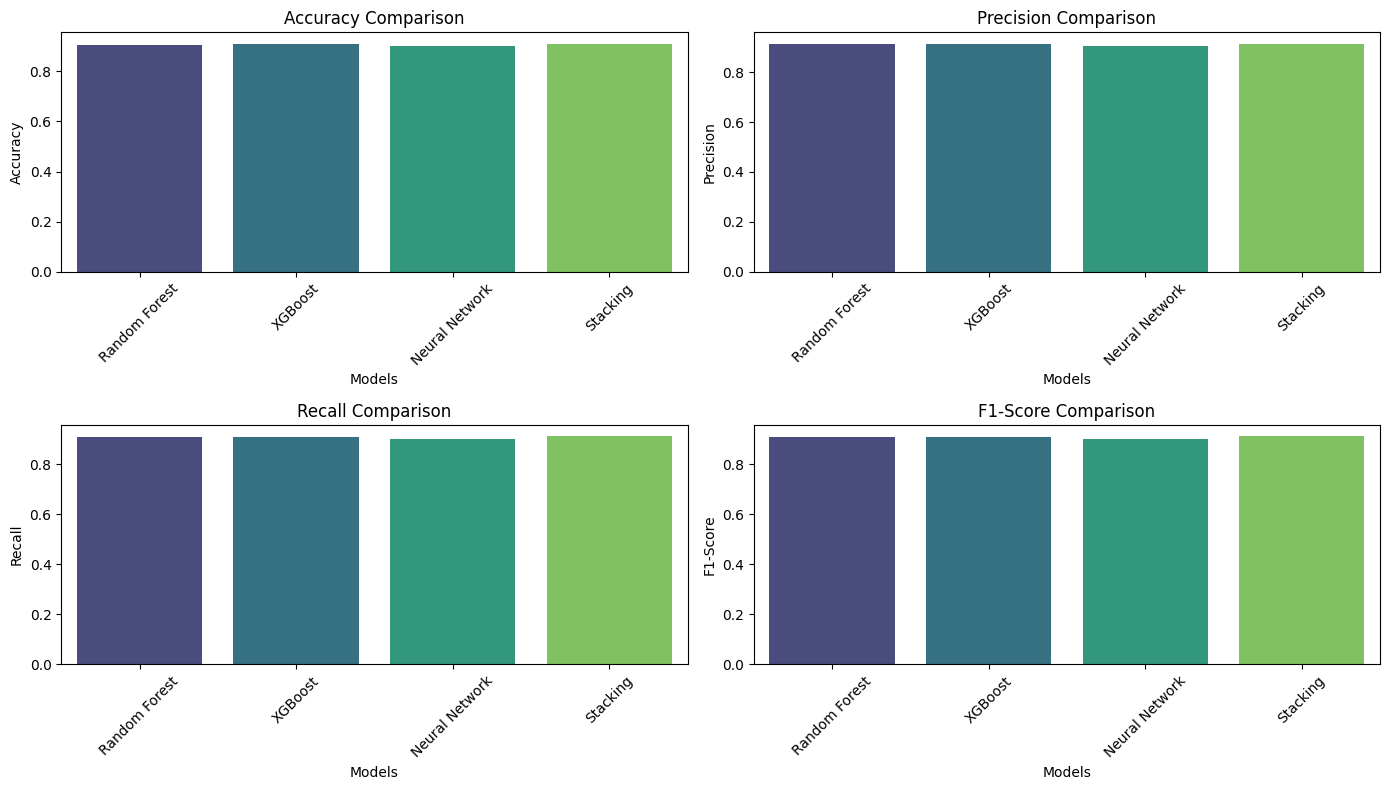

In [10]:
# Plot comparisons
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
    plt.title(f"{metric} Comparison")
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


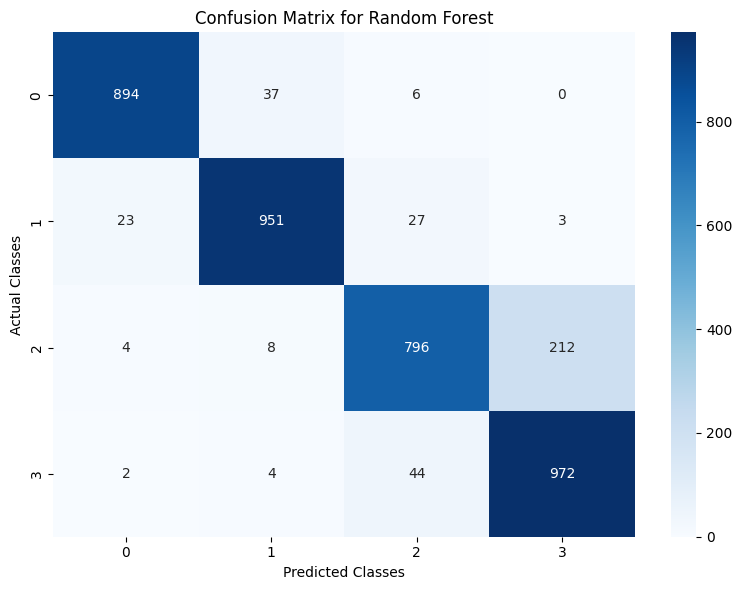

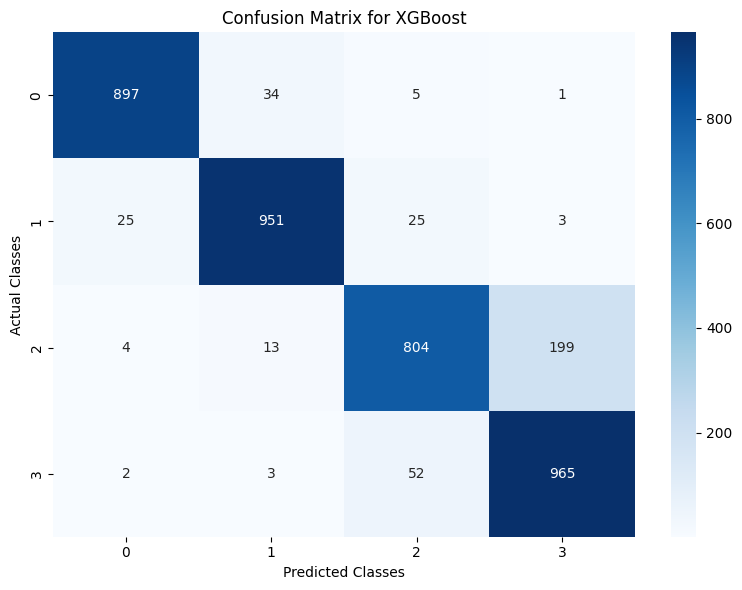

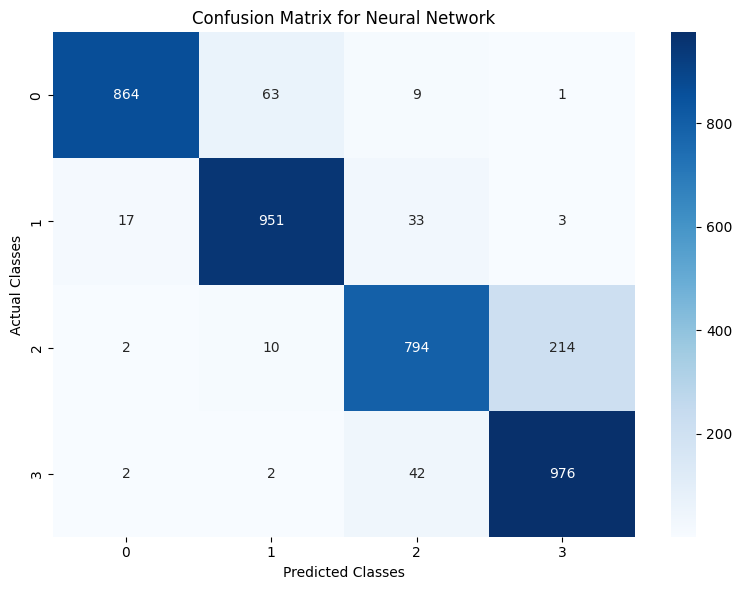

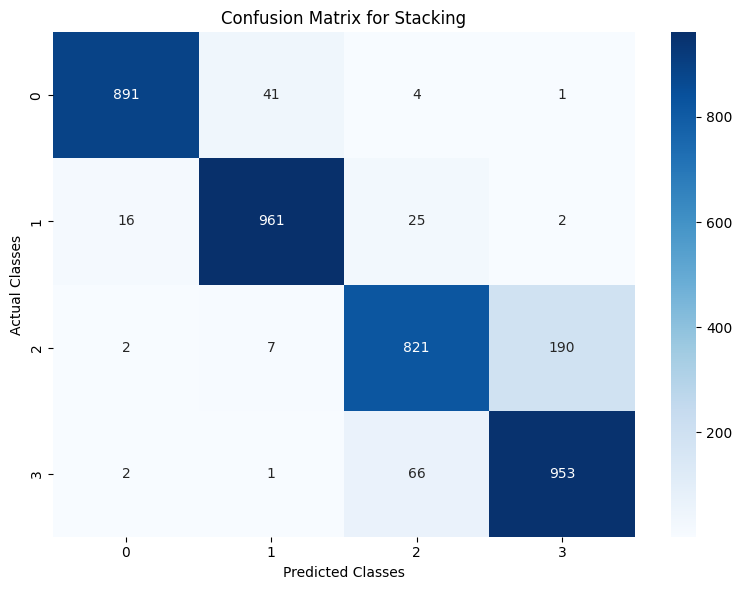

In [11]:

# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y),
                yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Classes")
    plt.ylabel("Actual Classes")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_mlp, "Neural Network")
plot_confusion_matrix(y_test, y_pred_stacking, "Stacking")



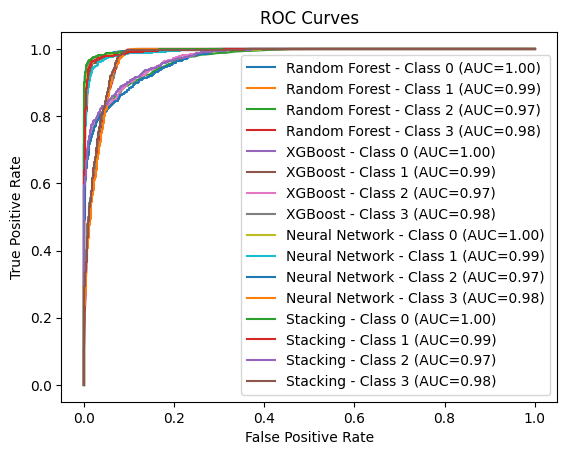

In [12]:
# ROC Curve for all models
def plot_roc_curves(y_test, models, model_names):
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    plt.figure()
    for i, (model, name) in enumerate(zip(models, model_names)):
        y_pred_prob = model.predict_proba(X_test)
        for j in range(y_test_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, j], y_pred_prob[:, j])
            auc = roc_auc_score(y_test_binarized[:, j], y_pred_prob[:, j])
            plt.plot(fpr, tpr, label=f"{name} - Class {j} (AUC={auc:.2f})")
    plt.title("ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

models = [rf_model, xgb_model, mlp_model, stacking_model]
model_names = ["Random Forest", "XGBoost", "Neural Network", "Stacking"]
plot_roc_curves(y_test, models, model_names)

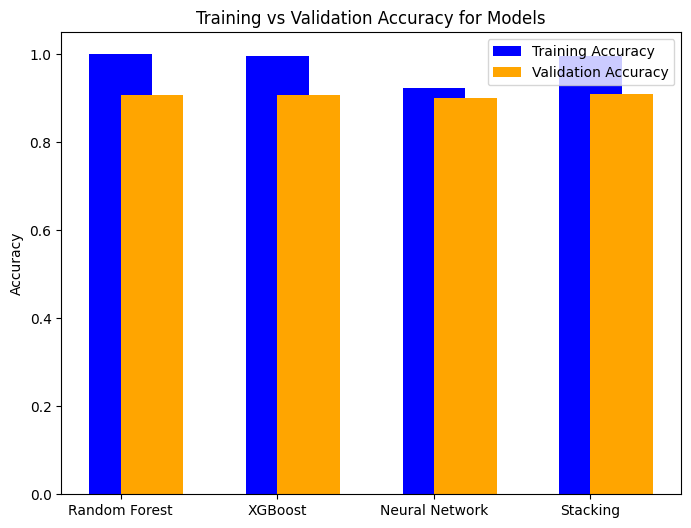

In [13]:
# Training and Validation Accuracy Comparison
rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)

xgb_train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
xgb_test_accuracy = accuracy_score(y_test, y_pred_xgb)

mlp_train_accuracy = accuracy_score(y_train, mlp_model.predict(X_train))
mlp_test_accuracy = accuracy_score(y_test, y_pred_mlp)

stacking_train_accuracy = accuracy_score(y_train, stacking_model.predict(X_train))
stacking_test_accuracy = accuracy_score(y_test, y_pred_stacking)

train_accuracies = [rf_train_accuracy, xgb_train_accuracy, mlp_train_accuracy, stacking_train_accuracy]
val_accuracies = [rf_test_accuracy, xgb_test_accuracy, mlp_test_accuracy, stacking_test_accuracy]
models = ["Random Forest", "XGBoost", "Neural Network", "Stacking"]

plt.figure(figsize=(8, 6))
x = range(len(models))
plt.bar(x, train_accuracies, width=0.4, label="Training Accuracy", color='blue', align='center')
plt.bar(x, val_accuracies, width=0.4, label="Validation Accuracy", color='orange', align='edge')
plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy for Models")
plt.legend()
plt.show()


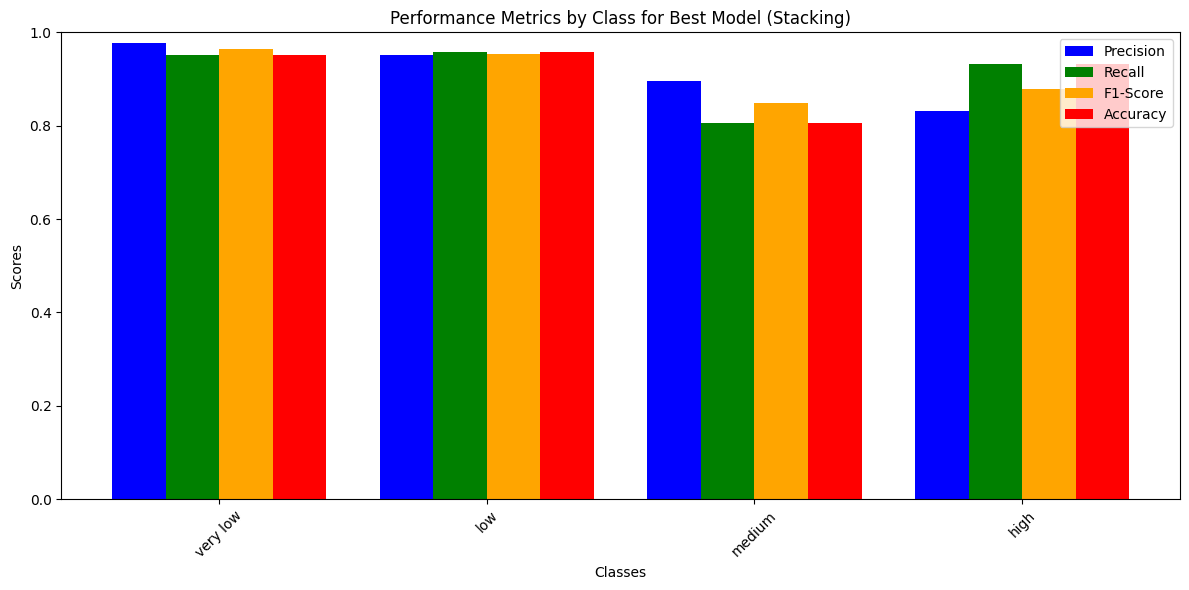

Overall Accuracy for Stacking Model: 0.9103690685413005


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming y_pred_stacking contains predictions and y_test contains true labels
# If predictions are probabilities, convert them to class labels
y_pred_stacking_labels = stacking_model.predict(X_test)

# Check the format of y_test
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # If y_test is in one-hot format
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test  # If y_test is already in label format

# Performance report for Stacking
stacking_report = classification_report(y_test_labels, y_pred_stacking_labels, target_names=["very low", "low", "medium", "high"], output_dict=True)
stacking_accuracy = accuracy_score(y_test_labels, y_pred_stacking_labels)

# Convert report to DataFrame
df_report = pd.DataFrame(stacking_report).transpose()

# Extract metrics for each class
metrics = ['precision', 'recall', 'f1-score']
class_metrics = df_report.loc["very low":"high", metrics]  # Values for each class

# Calculate class accuracies from confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_stacking_labels)
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)  # Accuracy for each class
class_metrics['accuracy'] = class_accuracies

# Plot the metrics
x = np.arange(len(class_metrics.index))  # Class names
width = 0.2  # Bar width

plt.figure(figsize=(12, 6))

# Plot bars for each metric
plt.bar(x - 1.5 * width, class_metrics['precision'], width, label='Precision', color='blue')
plt.bar(x - 0.5 * width, class_metrics['recall'], width, label='Recall', color='green')
plt.bar(x + 0.5 * width, class_metrics['f1-score'], width, label='F1-Score', color='orange')
plt.bar(x + 1.5 * width, class_metrics['accuracy'], width, label='Accuracy', color='red')

# Chart settings
plt.xticks(x, ["very low", "low", "medium", "high"], rotation=45)
plt.ylim([0, 1])
plt.title("Performance Metrics by Class for Best Model (Stacking)")
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.legend()
plt.tight_layout()
plt.show()

# Print overall performance
print(f"Overall Accuracy for Stacking Model: {stacking_accuracy}")
